# Analysis SCIP Heuristic

The feasible rounding approach is included as a heuristic in SCIP. This test is performed on the complete collection set of MIPLIB2017. The heuristic is called after the processing of the rootnode was finished with solved LP.

Required data:
- `diving_analysis/overall_results.pickle`: Dataframe with merged output of diving_analysis.py 
(column with best known feasible point was added, see /diving_analysis/raw_results/scipt_for_concat)

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
font = {'size'   : 14}
matplotlib.rc('font', **font)

In [2]:
result = pd.read_pickle('diving_analysis/overall_results')
result = result.sort_index()

We take the following times
- time_scip ('SCIP'): Run time of SCIP, before fra_heur was called.
- time_solveips ('time_root'): Time for solving the inner parallel set of the root node.
- time_diving_x ('x'): Time for solving all inner parallel sets in fra_heur when x dives are performed.

In [3]:
time_scip = result.time_scip-result.time_heur

In [4]:
best_diving1 = []
best_diving3 = []
best_diving5 = []
best_diving10 = []
time_diving1 = []
time_diving3 = []
time_diving5 = []
time_diving10 = []
columns = ['1','3','5','10','SCIP','root','v_star']
for problem_name in result.index:
    current_obj_vals = result.loc[problem_name]['obj_diving'].copy()
    current_obj_vals.insert(0,result.loc[problem_name]['obj_root'])
    current_times = result.loc[problem_name]['time_diving_lp']
    best_diving1.append(min(current_obj_vals[0:2]))
    best_diving3.append(min(current_obj_vals[0:4]))
    best_diving5.append(min(current_obj_vals[0:6]))
    best_diving10.append(min(current_obj_vals))
    time_diving1.append(current_times[0])
    time_diving3.append(sum(current_times[0:3]))
    time_diving5.append(sum(current_times[0:5]))
    time_diving10.append(sum(current_times))
obj_vals_diving = pd.DataFrame([best_diving1,best_diving3,best_diving5,
                                best_diving10,result.obj_SCIP,result.obj_root,result.v_star]).transpose()
obj_vals_diving.columns = columns
obj_vals_diving.index = result.index
obj_vals_diving = obj_vals_diving.loc[:][['root','1','3','5','10','SCIP','v_star']]

time_diving = pd.DataFrame([time_diving1,time_diving3,time_diving5,time_diving10,
                            time_scip,result.time_solveips]).transpose()
time_diving.columns = columns[0:-1]
time_diving.index = result.index
time_diving = time_diving.loc[:][['root','1','3','5','10','SCIP']]

In [5]:
res5best = obj_vals_diving[obj_vals_diving['5']<obj_vals_diving['SCIP']].copy()
res5best['v_star'] = result.loc[res5best.index,'v_star']

In [6]:
time_diving[time_diving['5']>1800].index

Index(['buildingenergy', 'ramos3', 'scpj4scip', 'scpk4', 'scpl4'], dtype='object', name='name')

In [7]:
print("Number of best incumbent solutions in the root node is",sum(obj_vals_diving['root']<obj_vals_diving['SCIP']))
for dives in ['1','3','5','10']:
    print("Number of best incumbent solutions with %s dives is %i"%(dives, sum(obj_vals_diving[dives]<(obj_vals_diving['SCIP']-1E-3))))

Number of best incumbent solutions in the root node is 16
Number of best incumbent solutions with 1 dives is 25
Number of best incumbent solutions with 3 dives is 32
Number of best incumbent solutions with 5 dives is 34
Number of best incumbent solutions with 10 dives is 35


In [8]:
time_diving.loc[res5best.index]

,root,1,3,5,10,SCIP
name,,,,,,
b1c1s1,1.578743,0.233412,0.814632,1.404266,3.039912,28.219098
b2c1s1,2.371176,0.408354,1.527243,2.549819,5.479916,36.965233
bg512142,0.129848,0.364227,1.111094,1.804617,3.496655,2.713420
buildingenergy,497.935507,1710.369529,2968.945738,2968.945738,2968.945738,809.592439
dg012142,0.604311,2.305240,6.806557,10.954481,22.207715,4.767794
gen-ip016,0.001051,0.020675,0.061619,0.103033,0.205874,0.025981
gen-ip054,0.000958,0.019301,0.056599,0.095511,0.190392,0.009566
gr4x6,0.001147,0.007605,0.022751,0.039009,0.081285,0.007237
gsvm2rl11,0.835988,4.590005,15.891135,29.583235,54.138052,4.482048


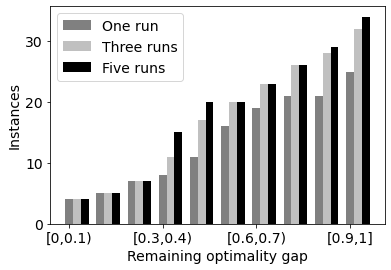

In [9]:
gap_closed1 = 1-(res5best['SCIP']-res5best['1'])/(res5best['SCIP']-res5best['v_star'])
gap_closed3 = 1-(res5best['SCIP']-res5best['3'])/(res5best['SCIP']-res5best['v_star'])
gap_closed5 = 1-(res5best['SCIP']-res5best['5'])/(res5best['SCIP']-res5best['v_star'])

a_heights, a_bins = np.histogram(gap_closed1, range=[0,1])
b_heights, b_bins = np.histogram(gap_closed3, bins=a_bins)
c_heights, c_bins = np.histogram(gap_closed5, bins=a_bins)

width = (a_bins[1] - a_bins[0])/4
fig, ax = plt.subplots()
ax.bar(a_bins[:-1], np.cumsum(a_heights), width=width, facecolor='grey')
ax.bar(b_bins[:-1]+width, np.cumsum(b_heights), width=width, facecolor='silver')
ax.bar(b_bins[:-1]+2*width, np.cumsum(c_heights), width=width, facecolor='black')
ax.set_xticks([0,.3,.6,.9])
ax.set_xticklabels(['[0,0.1)','[0.3,0.4)','[0.6,0.7)','[0.9,1]'])
ax.set_ylabel('Instances')
plt.legend(('One run','Three runs','Five runs'))
ax.set_xlabel('Remaining optimality gap')
fig.savefig('figures/barplotSCIP.pdf')

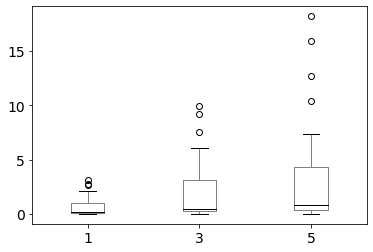

In [10]:
time_diving3best = time_diving[obj_vals_diving['3']<=(obj_vals_diving['SCIP']-1E-4)][['1','3','5','10','SCIP']]
time_share = time_diving3best.div(time_diving3best.SCIP,axis=0)
bp = time_share[['1','3','5']].plot(kind='box',
                                    grid=False, color=dict(boxes='grey', whiskers='grey', medians='black', caps='black'))
plt.savefig('figures/boxplotTimeScip.pdf')

In [11]:
print('In %i cases, three runs of the diving method need less time than SCIP spent before up to that point '
      %sum(time_share['3']<=1))
time_share.describe()

In 21 cases, three runs of the diving method need less time than SCIP spent before up to that point 


,1,3,5,10,SCIP
count,32.000000,32.000000,32.000000,32.000000,32.0
mean,0.651590,1.917506,3.251958,6.458283,1.0
std,0.911460,2.749919,4.805336,10.100471,0.0
min,0.007328,0.021644,0.035722,0.067513,1.0
25%,0.073342,0.231368,0.389345,0.767206,1.0
50%,0.144012,0.478698,0.824611,1.547676,1.0
75%,1.027419,3.132263,4.308879,8.620250,1.0
max,3.142199,9.890914,18.175690,40.682998,1.0


## Comparison with SCIP running on default settings: Detailed results for 12 instances 
We ran SCIP_plain.py on the instances, where 3 dives yielded best solutions. (Outputfile: /SCIP_plain/SCIP_plain_3_best.txt). For 12 instances, SCIP needed more than 30 seconds to compute a point of similar quality. We display the results for these instances here.  
Files:
- `SCIP_plain/12_instances_with_default_seed.txt`: Console output for SCIP_plain.py
- `names`: List of the 12 best instances

In [12]:
names = ['b1c1s1', 'b2c1s1', 'dg012142', 'gsvm2rl11', 'gsvm2rl12', 'gsvm2rl9',
       'mushroom-best', 'neos-983171', 'opm2-z10-s4', 'opm2-z8-s0', 'sorrell7',
       'sorrell8']

### Extract overall run time and run time of heuristics for run with default seed

In [13]:
df = pd.DataFrame(columns = ['Heuristic','ExecTime','SetupTime','Calls','Found','Best','Instance'])
df_rt_def = pd.DataFrame(index = names, columns=['Run time'])

datei = open('SCIP_plain/12_instances_with_default_seed.txt','r')

inst_no = 0
run_no = 0
write = False

for zeile in datei:
        words = zeile.split()
        if zeile.startswith('>>>>> Testing model'):
            instance = words[-1]
        if zeile.startswith('Solving Time (sec) :'):
            df_rt_def.loc[instance]['Run time'] = words[-1]
        if (zeile.startswith('Primal Heuristics') or write):
            if write == False:
                write = True
                inst_no += 1             
            else:
                if words[0] == 'Diving':
                    write = False
                else:
                    s1 = zeile.split(':')
                    s2 = s1[1].split()
                    s3 = [s1[0].strip()]+s2
                    s3.append(names[inst_no-1])
                    df.loc[len(df.index)] = s3
                    
# get the runtime of individual heuristics
heuristics = ['farkasdiving']

df_heur_standard = pd.DataFrame(columns = ['Instance','t_heur_all']+heuristics)

#preprocessing
df[df['ExecTime']=='-']=0.00
df['ExecTime'].astype(float)

# filling df_heur_standard
for name in names:
    temp1 = df[df['Instance']==name]
    temp1.set_index('Heuristic',inplace=True)
    summe = (sum(temp1['ExecTime'].astype(float)))
    df_heur_standard.loc[len(df_heur_standard.index)] = [name, summe]+[temp1.at[heur,'ExecTime'] for heur in heuristics]

### Extract overall run times of SCIP in 5 additional runs with different LP-Seeds
File:
- `SCIP_plain/12_instances_with_multiple_seeds.txt` the console output with all statistics for every run.

In [14]:
datei = open('SCIP_plain/12_instances_with_multiple_seeds.txt','r')

df_rt_full = pd.DataFrame(index = names, columns=['Run1','Run2','Run3','Run4','Run5'])
df = pd.DataFrame(columns = ['Heuristic','ExecTime','SetupTime','Calls','Found','Best','Instance','Run'])

run_no = 0
write = False

for zeile in datei:
        words = zeile.split()
        if zeile.startswith('>>>>>>>>>>>>>>> Run'):
            run_no = int(words[-1])
        if zeile.startswith('>>>>> Testing model'):
            instance = words[-1]
        if zeile.startswith('Solving Time (sec) :'):
            df_rt_full.loc[instance][run_no-1] = float(words[-1])
            
df_full_stat = pd.DataFrame(index = names, columns=['Min','Median','Max'])

for inst in df_rt_full.index:
    df_full_stat.at[inst,'Min'] = np.min(df_rt_full.loc[inst,:])
    df_full_stat.at[inst,'Median'] = np.median(df_rt_full.loc[inst,:])
    df_full_stat.at[inst,'Max'] = np.max(df_rt_full.loc[inst,:])

### Building table 1

In [15]:
df_heur_standard.set_index('Instance',inplace=True)

In [16]:
table1 = pd.merge(df_full_stat,df_heur_standard, left_index=True, right_index=True, sort=True)
table1 = pd.merge(df_rt_def, table1, left_index=True, right_index=True, sort=True)
table1b = pd.merge(obj_vals_diving.loc[names,['root','3','v_star']], time_diving.loc[names,['3']], left_index=True, right_index=True, sort=True)
table1_paper = pd.merge(table1b, table1, left_index=True, right_index=True, sort=True)
table1_paper.columns = ['root','diving','optimal','time diving','one run','best','median','worst','heuristics','farkas diving']
table1_paper

,root,diving,optimal,time diving,one run,best,median,worst,heuristics,farkas diving
name,,,,,,,,,,
b1c1s1,7.255500e+04,6.907153e+04,2.454425e+04,0.814632,34.87,34.88,34.92,34.98,7.92,5.44
b2c1s1,7.367652e+04,6.870152e+04,2.568790e+04,1.527243,44.91,44.94,45,45.13,9.91,7.28
dg012142,2.562349e+07,1.437338e+07,2.300867e+06,6.806557,40.71,40.7,40.72,40.84,8.45,1.98
gsvm2rl11,4.263534e+04,3.979284e+04,1.812164e+04,15.891135,64.28,63.74,64.15,64.3,19.70,10.13
gsvm2rl12,3.435304e+01,3.435304e+01,2.212012e+01,29.404185,1800.00,729.69,1800,1800.03,949.41,573.87
gsvm2rl9,1.638276e+04,1.361189e+04,7.438181e+03,3.858767,365.03,51.34,103.84,365.16,94.48,67.18
mushroom-best,3.613896e+03,2.072896e+03,5.533376e-02,11.378274,79.58,5.46,62.29,135.38,17.71,9.36
neos-983171,5.098700e+04,8.747000e+03,2.360000e+03,84.715806,227.77,207.44,231.1,283,129.01,56.83
opm2-z10-s4,-1.489000e+03,-2.268100e+04,-3.326900e+04,18.206594,295.14,294.58,297.36,299.13,200.57,199.17


In [20]:
for ind in table1_paper.columns:
    table1_paper[ind].astype(float)
table1_paper = table1_paper.sort_index()
print(table1_paper.to_latex(float_format ="{:0.1f}".format))

\begin{tabular}{lrrrrllllrl}
\toprule
{} &       root &     diving &   optimal &  time diving &  one run &   best & median &  worst &  heuristics & farkas diving \\
name          &            &            &           &              &          &        &        &        &             &               \\
\midrule
b1c1s1        &    72555.0 &    69071.5 &   24544.2 &          0.8 &    34.87 &   34.9 &   34.9 &   35.0 &         7.9 &          5.44 \\
b2c1s1        &    73676.5 &    68701.5 &   25687.9 &          1.5 &    44.91 &   44.9 &   45.0 &   45.1 &         9.9 &          7.28 \\
dg012142      & 25623489.0 & 14373382.6 & 2300867.0 &          6.8 &    40.71 &   40.7 &   40.7 &   40.8 &         8.4 &          1.98 \\
gsvm2rl11     &    42635.3 &    39792.8 &   18121.6 &         15.9 &    64.28 &   63.7 &   64.2 &   64.3 &        19.7 &         10.13 \\
gsvm2rl12     &       34.4 &       34.4 &      22.1 &         29.4 &  1800.00 &  729.7 & 1800.0 & 1800.0 &       949.4 &        573.87 \